In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('DATA RUMAH.xlsx').iloc[:,2:]
df.tail()

,HARGA,LB,LT,KT,KM,GRS
1005,9000000000,450,550,10,10,3
1006,4000000000,160,140,4,3,2
1007,4000000000,139,230,4,4,1
1008,19000000000,360,606,7,4,0
1009,10500000000,420,430,7,4,2


In [3]:
scaled_df = df.copy()

In [4]:
# scaler = MinMaxScaler(feature_range=(-1,1))
# scaler1 = MinMaxScaler(feature_range=(-1,1))

In [5]:
scaler = StandardScaler()
scaler1 = StandardScaler()

In [6]:
cols = scaled_df.columns[1:]
cols

Index(['LB', 'LT', 'KT', 'KM', 'GRS'], dtype='object')

In [7]:
scaled_df[cols] = scaler.fit_transform(scaled_df[cols])

In [8]:
scaled_df

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,-0.318038,-0.096919,-1.061272,-0.428305,-1.271837
1,4600000000,-0.543039,-0.558367,-0.425139,-0.428305,0.052447
2,3000000000,-0.053661,0.069870,-0.425139,0.276236,1.376731
3,430000000,-1.330545,-1.181044,-1.697406,-1.132847,-1.271837
4,9000000000,0.694470,0.653629,0.847128,0.980778,0.714589
...,...,...,...,...,...,...
1005,9000000000,0.975722,1.737755,3.391663,4.503485,0.714589
1006,4000000000,-0.655540,-0.541688,-0.425139,-0.428305,0.052447
1007,4000000000,-0.773666,-0.041323,-0.425139,0.276236,-0.609695
1008,19000000000,0.469468,2.049093,1.483262,0.276236,-1.271837


In [9]:
X = scaled_df.iloc[:,1:]
y = scaler1.fit_transform(scaled_df.HARGA.values.reshape(-1,1))

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=7777)

In [16]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [17]:
RF = RFR()

In [21]:
RF.fit(X_train,y_train)
RF.score(X_train,y_train)

/opt/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9494372719247682

In [23]:
RF.score(X_test,y_test)

0.754649124436283

In [25]:
mean_absolute_error(RF.predict(X_test),y_test)

0.2812918848958427

In [27]:
prediction_no_tuning = RF.predict(X_test)
prediction_no_tuning = scaler1.inverse_transform(prediction_no_tuning.reshape(-1,1))
y_test_inverse = scaler1.inverse_transform(y_test.reshape(-1,1))
mean_absolute_percentage_error(y_test_inverse,prediction_no_tuning)

0.26748246944041004

In [28]:
MAPE = mean_absolute_percentage_error(y_test_inverse,prediction_no_tuning)
MAE = mean_absolute_error(y_test_inverse,prediction_no_tuning)
print('MAPE',MAPE,'MAE',MAE)

MAPE 0.26748246944041004 MAE 2063925973.3680854


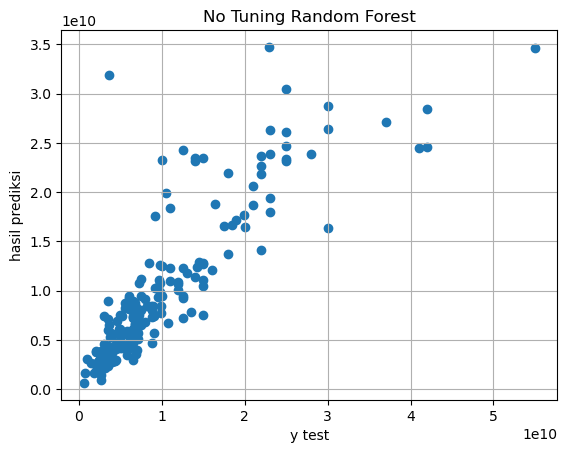

In [30]:
plt.scatter(y_test_inverse,prediction_no_tuning)
plt.title('No Tuning Random Forest')
plt.xlabel('y test')
plt.ylabel('hasil prediksi')
plt.grid()
plt.show()

# HyperParameter Tuning

## Grid Search CV

In [53]:
param_grid = [    
    {'n_estimators':[100,150,200,250,300],
    'max_depth' : [6,7,8,9,10,20], 'min_samples_split':[2,5,10],'max_features':['sqrt','log2'],
    'random_state':[42]
    }
]

In [54]:
clf = GridSearchCV(RF, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [55]:
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


/opt/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

In [56]:
best_clf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 150,
 'random_state': 42}

In [57]:
RF1 = RFR(**best_clf.best_params_)

In [58]:
RF1.fit(X_train,y_train)
print(RF1.score(X_train,y_train))
print(RF1.score(X_test,y_test))

/opt/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9555075705057143
0.7669879862365392


In [60]:
prediction_grid = RF1.predict(X_test)
prediction_grid = scaler1.inverse_transform(prediction_grid.reshape(-1,1))
y_test_inverse = scaler1.inverse_transform(y_test.reshape(-1,1))

In [61]:
MAPE = mean_absolute_percentage_error(y_test_inverse,prediction_grid)
MAE = mean_absolute_error(y_test_inverse,prediction_grid)
print('MAPE',MAPE,'MAE',MAE)

MAPE 0.25583005888039234 MAE 2099457697.6727912


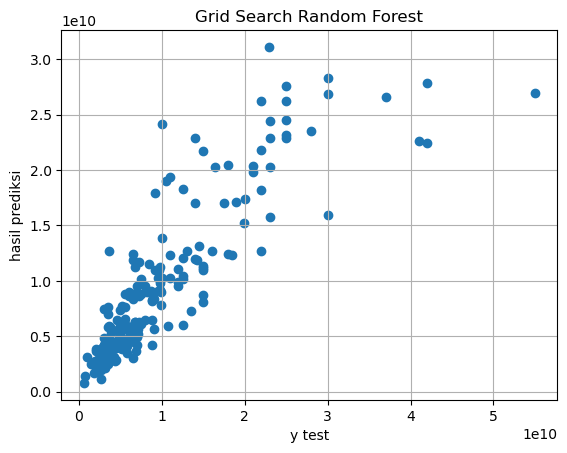

In [64]:
plt.scatter(y_test_inverse,prediction_grid)
plt.title('Grid Search Random Forest')
plt.xlabel('y test')
plt.ylabel('hasil prediksi')
plt.grid()
plt.show()

## Randomized Search

In [65]:
param_grid = [    
    {'n_estimators':[100,150,200,250,300],
    'max_depth' : [6,7,8,9,10,20], 'min_samples_split':[2,5,10],'max_features':['sqrt','log2'],
    'random_state':[42]
    }
]

In [66]:
RF2 = RFR()

In [68]:
random_search = RandomizedSearchCV(estimator=RF2,param_distributions=param_grid,n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

In [69]:
random_search.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions=[{'max_depth': [6, 7, 8, 9, 10, 20],
                                         'max_features': ['sqrt', 'log2'],
                                         'min_samples_split': [2, 5, 10],
                                         'n_estimators': [100, 150, 200, 250,
                                                          300],
                                         'random_state': [42]}],
                   random_state=42, verbose=2)

In [70]:
best_params = random_search.best_params_

In [71]:
best_params

{'random_state': 42,
 'n_estimators': 150,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 10}

In [74]:
RF3= RFR(**best_params)

In [76]:
RF3.fit(X_train,y_train)

/opt/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=150,
                      random_state=42)

In [78]:
RF3.score(X_train,y_train)

0.9555075705057143

In [79]:
RF3.score(X_test,y_test)

0.7669879862365392

In [80]:
mean_absolute_error(RF3.predict(X_test),y_test)

0.2861344935127399

In [81]:
prediction_random_search = RF3.predict(X_test)
prediction_random_search = scaler1.inverse_transform(prediction_random_search.reshape(-1,1))
y_test_inverse = scaler1.inverse_transform(y_test.reshape(-1,1))

In [82]:
MAPE = mean_absolute_percentage_error(y_test_inverse,prediction_random_search)
MAE = mean_absolute_error(y_test_inverse,prediction_random_search)
print('MAPE',MAPE,'MAE',MAE)

MAPE 0.25583005888039234 MAE 2099457697.6727912


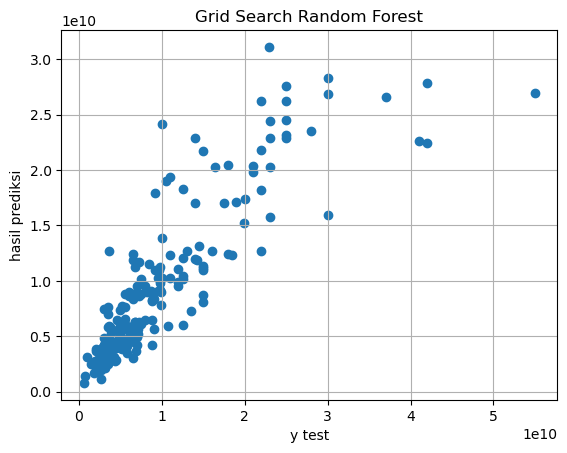

[CV] END max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=250, random_state=42; total time=   0.3s
[CV] END max_depth=6, max_features=log2, min_samples_split=2, n_estimators=100, random_state=42; total time=   0.1s
[CV] END max_depth=6, max_features=log2, min_samples_split=5, n_estimators=300, random_state=42; total time=   0.3s
[CV] END max_depth=9, max_features=log2, min_samples_split=10, n_estimators=250, random_state=42; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300, random_state=42; total time=   0.3s
[CV] END max_depth=7, max_features=log2, min_samples_split=5, n_estimators=150, random_state=42; total time=   0.1s
[CV] END max_depth=9, max_features=sqrt, min_samples_split=5, n_estimators=150, random_state=42; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100, random_state=42; total time=   0.1s
[CV] END max_depth=7, max_features=sqrt, min_samples_split=2, n_esti

In [84]:
plt.scatter(y_test_inverse,prediction_random_search)
plt.title('Grid Search Random Forest')
plt.xlabel('y test')
plt.ylabel('hasil prediksi')
plt.grid()
plt.show()